# Stock Market Prediction of Apple Dataset using Time series

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
Date=pd.date_range('dec 21 2017',periods=1257,freq='d')
Date=pd.DataFrame(Date)

In [3]:
Date.rename(columns ={'0':'DATE'}, inplace = True)

In [4]:
Data=pd.read_csv('AAPL.csv')

In [5]:
Data=pd.concat([Date,Data],axis=1)

In [6]:
Data.shape

(1257, 15)

In [7]:
Data.head()

,0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2017-12-21,AAPL,2017-12-21 00:00:00+00:00,175.01,176.02,174.10,174.17,20356826,41.602321,41.842412,41.386002,41.402642,81427304,0.0,1.0
1,2017-12-22,AAPL,2017-12-22 00:00:00+00:00,175.01,175.42,174.50,174.68,16052615,41.602321,41.699784,41.481087,41.523876,64210460,0.0,1.0
2,2017-12-23,AAPL,2017-12-26 00:00:00+00:00,170.57,171.47,169.68,170.80,32968167,40.546871,40.760814,40.335306,40.601546,131872668,0.0,1.0
3,2017-12-24,AAPL,2017-12-27 00:00:00+00:00,170.60,170.78,169.71,170.10,21672062,40.554003,40.596791,40.342437,40.435146,86688248,0.0,1.0
4,2017-12-25,AAPL,2017-12-28 00:00:00+00:00,171.08,171.85,170.48,171.00,15997739,40.668105,40.851145,40.525477,40.649088,63990956,0.0,1.0


In [8]:
Data.tail()

,0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,2021-05-26,AAPL,2022-12-13 00:00:00+00:00,145.47,149.9692,144.240,149.500,93886161,145.47,149.9692,144.240,149.500,93886161,0.0,1.0
1253,2021-05-27,AAPL,2022-12-14 00:00:00+00:00,143.21,146.6550,141.160,145.350,82291182,143.21,146.6550,141.160,145.350,82291182,0.0,1.0
1254,2021-05-28,AAPL,2022-12-15 00:00:00+00:00,136.50,141.8000,136.025,141.110,98931907,136.50,141.8000,136.025,141.110,98931907,0.0,1.0
1255,2021-05-29,AAPL,2022-12-16 00:00:00+00:00,134.51,137.6500,133.730,136.685,160156900,134.51,137.6500,133.730,136.685,160156900,0.0,1.0
1256,2021-05-30,AAPL,2022-12-19 00:00:00+00:00,132.37,135.2000,131.320,135.110,79592614,132.37,135.2000,131.320,135.110,79592614,0.0,1.0


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   0            1257 non-null   datetime64[ns]
 1   symbol       1257 non-null   object        
 2   date         1257 non-null   object        
 3   close        1257 non-null   float64       
 4   high         1257 non-null   float64       
 5   low          1257 non-null   float64       
 6   open         1257 non-null   float64       
 7   volume       1257 non-null   int64         
 8   adjClose     1257 non-null   float64       
 9   adjHigh      1257 non-null   float64       
 10  adjLow       1257 non-null   float64       
 11  adjOpen      1257 non-null   float64       
 12  adjVolume    1257 non-null   int64         
 13  divCash      1257 non-null   float64       
 14  splitFactor  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(2)


In [10]:
Data.isnull().sum()

0              0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [19]:
df=Data.set_index(0)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,,,,,,,,,,,,,,
2017-12-21,AAPL,2017-12-21 00:00:00+00:00,175.01,176.0200,174.100,174.170,20356826,41.602321,41.842412,41.386002,41.402642,81427304,0.0,1.0
2017-12-22,AAPL,2017-12-22 00:00:00+00:00,175.01,175.4200,174.500,174.680,16052615,41.602321,41.699784,41.481087,41.523876,64210460,0.0,1.0
2017-12-23,AAPL,2017-12-26 00:00:00+00:00,170.57,171.4700,169.680,170.800,32968167,40.546871,40.760814,40.335306,40.601546,131872668,0.0,1.0
2017-12-24,AAPL,2017-12-27 00:00:00+00:00,170.60,170.7800,169.710,170.100,21672062,40.554003,40.596791,40.342437,40.435146,86688248,0.0,1.0
2017-12-25,AAPL,2017-12-28 00:00:00+00:00,171.08,171.8500,170.480,171.000,15997739,40.668105,40.851145,40.525477,40.649088,63990956,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26,AAPL,2022-12-13 00:00:00+00:00,145.47,149.9692,144.240,149.500,93886161,145.470000,149.969200,144.240000,149.500000,93886161,0.0,1.0
2021-05-27,AAPL,2022-12-14 00:00:00+00:00,143.21,146.6550,141.160,145.350,82291182,143.210000,146.655000,141.160000,145.350000,82291182,0.0,1.0
2021-05-28,AAPL,2022-12-15 00:00:00+00:00,136.50,141.8000,136.025,141.110,98931907,136.500000,141.800000,136.025000,141.110000,98931907,0.0,1.0


### I have to perdict Day High

In [22]:
df1=pd.DataFrame(df['high'])
df1.head()

,high
0,
2017-12-21,176.02
2017-12-22,175.42
2017-12-23,171.47
2017-12-24,170.78
2017-12-25,171.85


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2017-12-21 to 2021-05-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   high    1257 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB


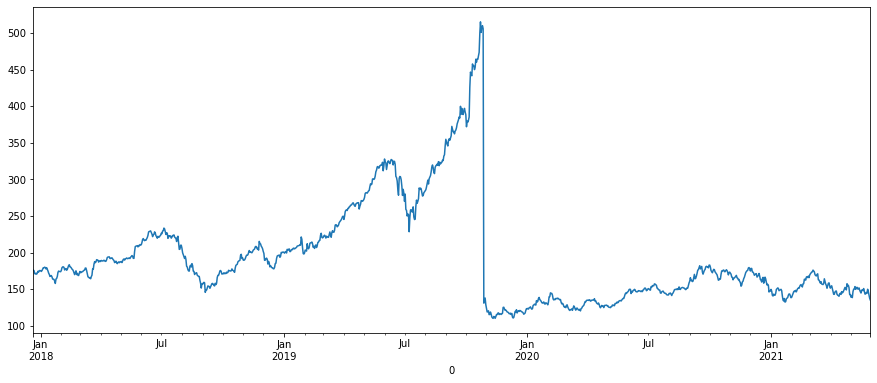

In [24]:
plt.figure(figsize=(15,6))
df1.high.plot();

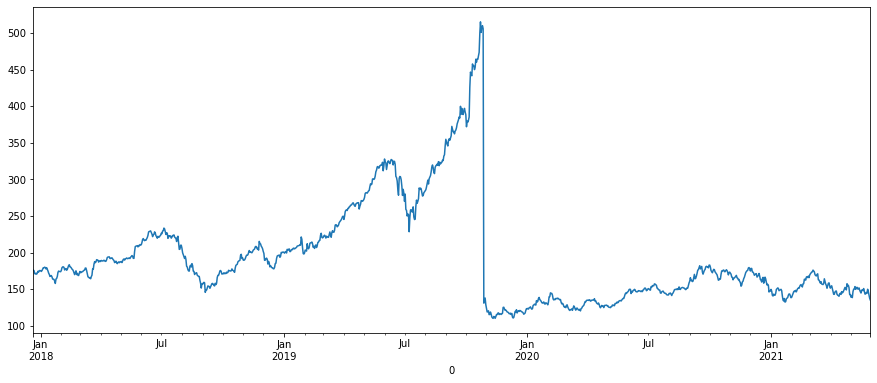

In [25]:
plt.figure(figsize=(15,6))
df1.high.plot();

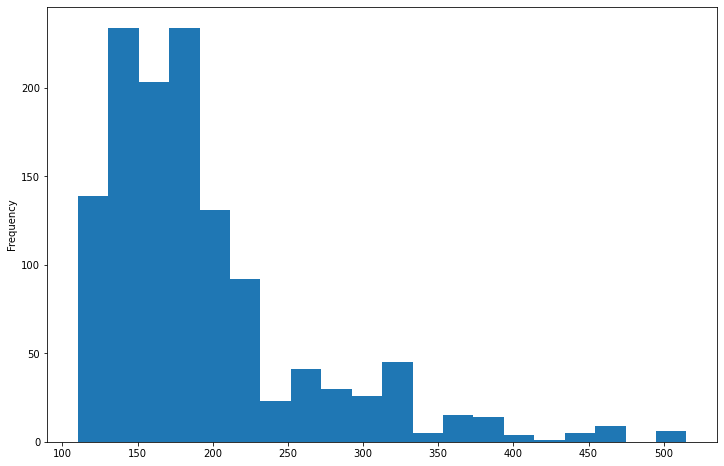

In [26]:
plt.figure(figsize=(12,8))
df1.high.plot(kind="hist", bins=20);

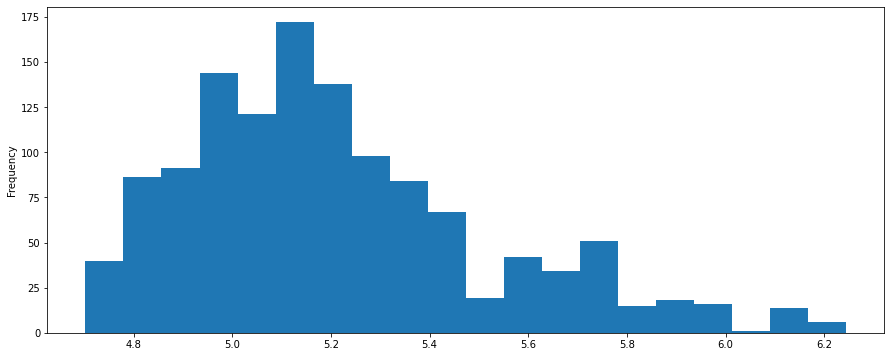

In [27]:
plt.figure(figsize=(15,6))
df1["log_high"] = np.log(df1.high);
df1.log_high.plot(kind="hist", bins=20);

In [31]:
high_mean= df1.log_high.mean()
df1["high_mean"] = np.exp(high_mean)
df1.head()

,high,log_high,df1_mean,high_mean
0,,,,
2017-12-21,176.02,5.170598,183.284013,183.284013
2017-12-22,175.42,5.167183,183.284013,183.284013
2017-12-23,171.47,5.144408,183.284013,183.284013
2017-12-24,170.78,5.140376,183.284013,183.284013
2017-12-25,171.85,5.146622,183.284013,183.284013


In [30]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [35]:
mean_modelRMSE = RMSE(df1.high, df1.high_mean)
mean_modelRMSE

70.23267275075241

### Building time series model and check the performance of the model using RMSE

In [36]:
high_mean= df1.log_high.mean()
df1["high_mean"] = np.exp(high_mean)

In [37]:
mean_modelRMSE = RMSE(df1.high, df1.high_mean)
mean_modelRMSE

70.23267275075241

In [38]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(high_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,183.284013,70.232673


## Plot ACF and PACF plots

In [39]:
df1["shift_log_high"] = df1.log_high.shift()
df1["log_high_diff"] = df1['log_high'] - df1['shift_log_high']



ts = df1.log_high
ts_diff = df1.log_high_diff
ts_diff.dropna(inplace = True)

In [40]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

array([ 1.        ,  0.00179285, -0.02393386,  0.03124149,  0.0436276 ,
        0.0172395 , -0.04093103, -0.00844236,  0.02707529, -0.00285525,
       -0.02055819,  0.01739286,  0.01532931,  0.00613101,  0.01009348,
       -0.01720355,  0.01574467, -0.00175804, -0.00650765, -0.00668716,
       -0.02771809])

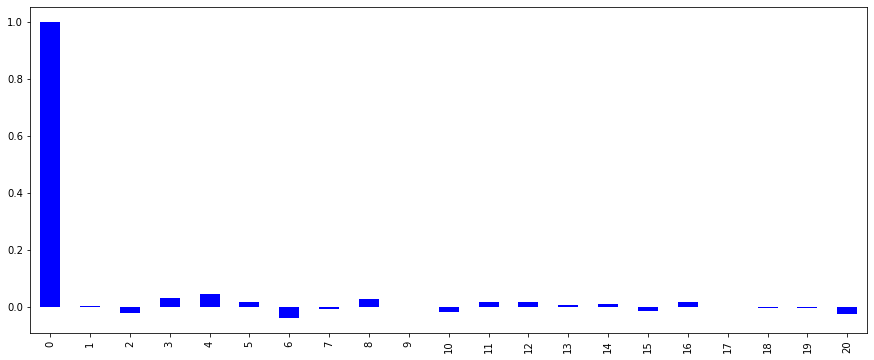

In [41]:
# ACF
plt.figure(figsize=(15,6))
ACF = pd.Series(lag_acf);
ACF.plot(kind="bar",color="blue");

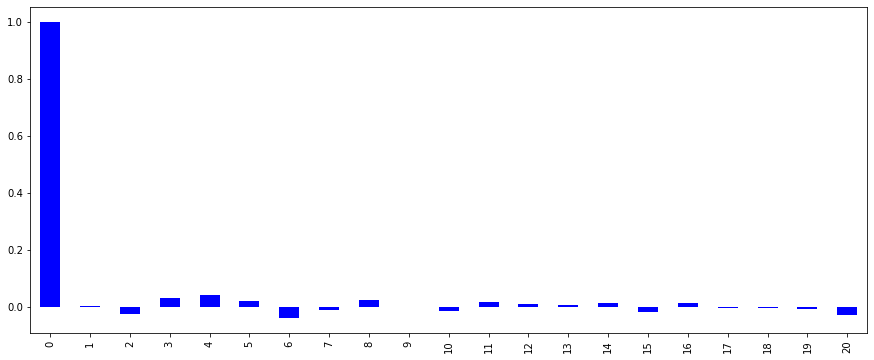

In [42]:
# PACF
plt.figure(figsize=(15,6))
lag_pacf = pacf(ts_diff, nlags=20, method='ols');
PACF = pd.Series(lag_pacf);
PACF.plot(kind="bar", color="blue");

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
rv_seasonal=seasonal_decompose(df1['high'],period=12)  

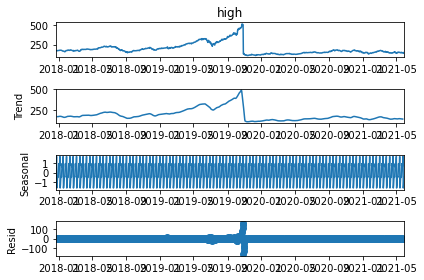

In [45]:
rv_seasonal.plot();

####  sequential sampling

In [46]:
train=df1.high[0:-24]
test=df1.high[-24:]

In [47]:
test.head()

0
2021-05-07    153.59
2021-05-08    149.87
2021-05-09    151.48
2021-05-10    152.70
2021-05-11    150.37
Name: high, dtype: float64

In [48]:
train_log=np.log(train)

#### ARIMA

In [49]:
from pmdarima import auto_arima
auto_arima(train_log,seasonal=True,m=24)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 24),
      suppress_warnings=True, with_intercept=False)

#### SARIMAX

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_log, order=(0,1,0), seasonal_order=(0,0,0,24))

C:\Users\Yashwant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Yashwant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [53]:
results = model.fit()

In [54]:
pred = results.forecast(steps=24)
pred

2021-05-07    5.0125
2021-05-08    5.0125
2021-05-09    5.0125
2021-05-10    5.0125
2021-05-11    5.0125
2021-05-12    5.0125
2021-05-13    5.0125
2021-05-14    5.0125
2021-05-15    5.0125
2021-05-16    5.0125
2021-05-17    5.0125
2021-05-18    5.0125
2021-05-19    5.0125
2021-05-20    5.0125
2021-05-21    5.0125
2021-05-22    5.0125
2021-05-23    5.0125
2021-05-24    5.0125
2021-05-25    5.0125
2021-05-26    5.0125
2021-05-27    5.0125
2021-05-28    5.0125
2021-05-29    5.0125
2021-05-30    5.0125
Freq: D, Name: predicted_mean, dtype: float64

In [56]:
pred = np.exp(pred)

In [57]:
pred.index

DatetimeIndex(['2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30'],
              dtype='datetime64[ns]', freq='D')

In [58]:
len(pred)

24

In [59]:
forcast = pd.DataFrame({'pred':pred})
forcast['date'] = test.index
forcast.date = pd.to_datetime(forcast.date, infer_datetime_format=True)
forcast = forcast.set_index(['date'])
forcast

,pred
date,
2021-05-07,1.844059e+65
2021-05-08,1.844059e+65
2021-05-09,1.844059e+65
2021-05-10,1.844059e+65
2021-05-11,1.844059e+65
2021-05-12,1.844059e+65
2021-05-13,1.844059e+65
2021-05-14,1.844059e+65
2021-05-15,1.844059e+65


In [60]:
forcast_train = pd.DataFrame({'train':train})
forcast_train['date'] = train.index
forcast_train.date = pd.to_datetime(forcast_train.date, infer_datetime_format=True)
forcast_train = forcast_train.set_index(['date'])
forcast_train

,train
date,
2017-12-21,176.02
2017-12-22,175.42
2017-12-23,171.47
2017-12-24,170.78
2017-12-25,171.85
...,...
2021-05-02,141.43
2021-05-03,138.55
2021-05-04,146.87


In [61]:
forcast_test = pd.DataFrame({'Test':test})
forcast_test['date'] = test.index
forcast_test.date = pd.to_datetime(forcast_test.date, infer_datetime_format=True)
forcast_test = forcast_test.set_index(['date'])
forcast_test

,Test
date,
2021-05-07,153.5900
2021-05-08,149.8700
2021-05-09,151.4800
2021-05-10,152.7000
2021-05-11,150.3700
2021-05-12,150.4200
2021-05-13,151.8300
2021-05-14,148.8800
2021-05-15,146.6400


## THANK YOU!